In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 70, 
    maxiter = 10, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

feature_generator_kargs = {
    "operations" : [add, sub, mul, div, hyp, log],
    "operation_names" : ["+", "-", "*", "/", "hyp", "log"],
    "popsize" : 80,
    "maxiter" : 100,
    "mutation_rate" : 0.05,
    "max_tree_depth" : 8,
}

In [4]:
dataset = pd.read_csv("csv/winequality-red.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
tester = tester(X, y, feature_generator_kargs, 8, 1, 400, verbose = True, test_size = 0.3)

In [6]:
tester.test_models(notests=30, nodatatests=3)

Split:  0 Feature:  0
Iteration:  99 Best fitness:  0.2679579247370296 Generation best 0.267057919111994558
Split:  0 Feature:  1
Iteration:  99 Best fitness:  0.23807023793898707 Generation best 0.18720117000731253
Split:  0 Feature:  2
Iteration:  99 Best fitness:  0.25788911180694885 Generation best 0.18720117000731254
Split:  0 Feature:  3
Iteration:  99 Best fitness:  0.22695141844636524 Generation best 0.22383889899311876
Split:  0 Feature:  4
Iteration:  99 Best fitness:  0.22983893649335307 Generation best 0.21596384977406113
Split:  0 Feature:  5
Iteration:  99 Best fitness:  0.21663885399283744 Generation best 0.18720117000731252
Split:  0 Feature:  6
Iteration:  99 Best fitness:  0.22983893649335307 Generation best 0.18720117000731258
Split:  0 Feature:  7
Iteration:  99 Best fitness:  0.24603903774398594 Generation best 0.22383889899311872
Iteration 4 - MSE 0.6975216213091268, R2 0.41335632002617406, MAE 0.608414349931488, NEW_MSE 0.7176344561713904, NEW_R2 0.39644061863736

In [7]:
import os

# create forlder insuranse

if not os.path.exists("results/winequality"):
    os.makedirs("results/winequality")

for key in tester.individual_tests:
    tester.individual_tests[key].to_csv("results/winequality/" + key + ".csv")

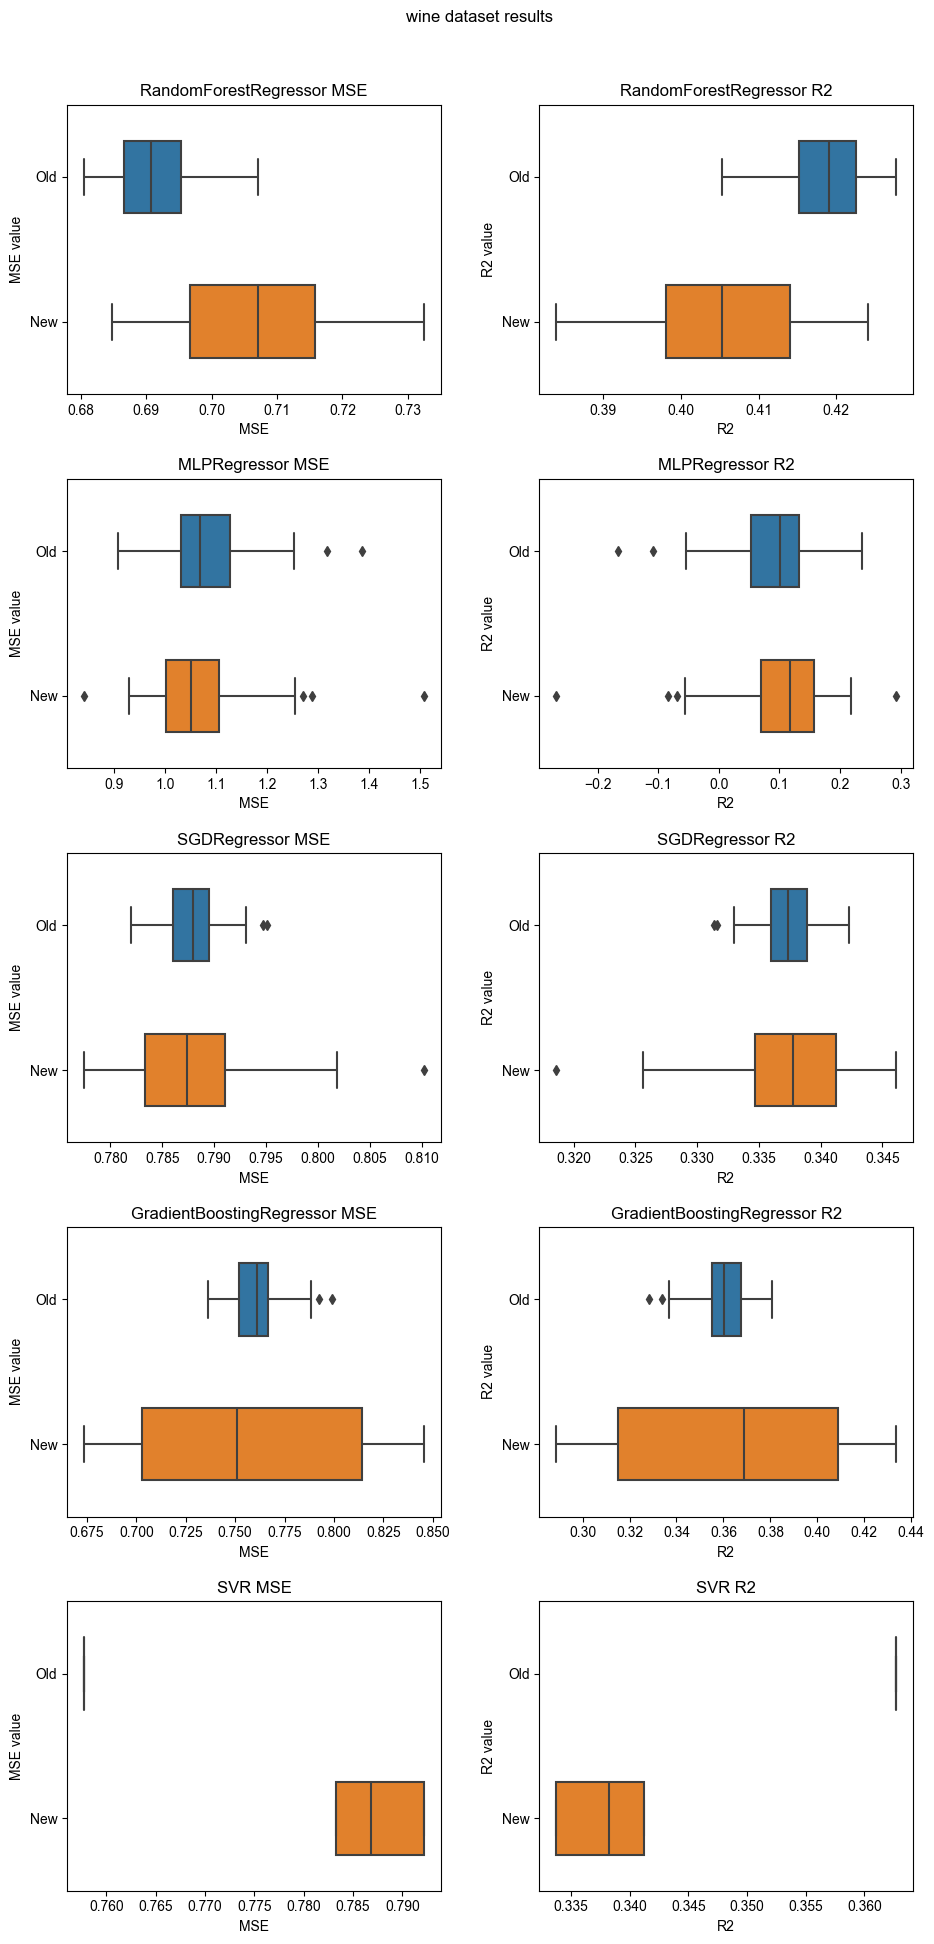

In [8]:
tests = tester.get_individual_tests()

from makeplots import make_boxplots

make_boxplots(tests, "wine")

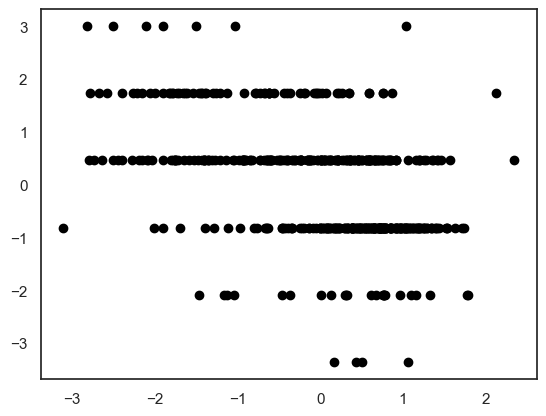

Min:  -3.1052150417193913 Max:  2.3414369484296476 Mean:  0.009415087940178708 Std:  1.0202759336390383


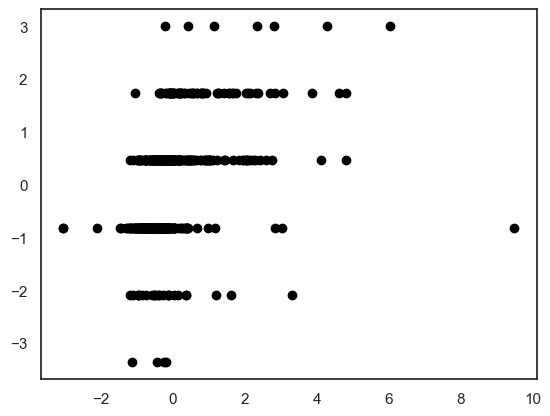

Min:  -3.059027495321786 Max:  9.490477191479771 Mean:  0.008263086241612453 Std:  1.1102911599116823


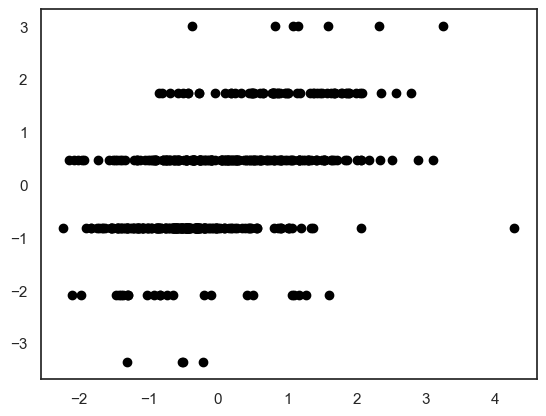

Min:  -2.228369425646582 Max:  4.26751135448105 Mean:  -0.037863727620950006 Std:  1.032508309931511


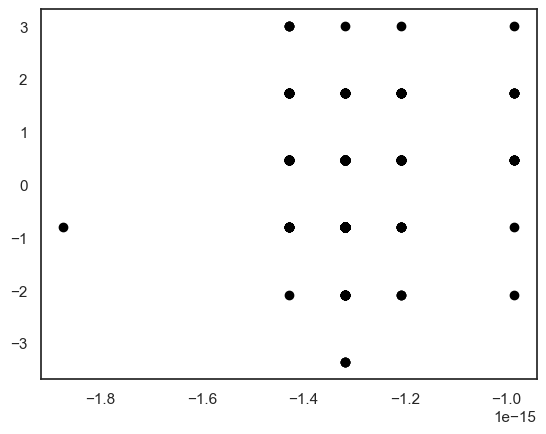

Min:  -1.8735013540549517e-15 Max:  -9.853229343548264e-16 Mean:  -1.307750204423049e-15 Std:  9.283146305142836e-17


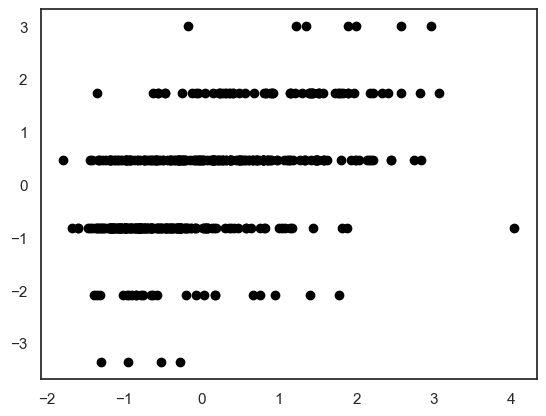

Min:  -1.7871506469961795 Max:  4.033187199300649 Mean:  -0.02083765684375562 Std:  1.0169975440485786


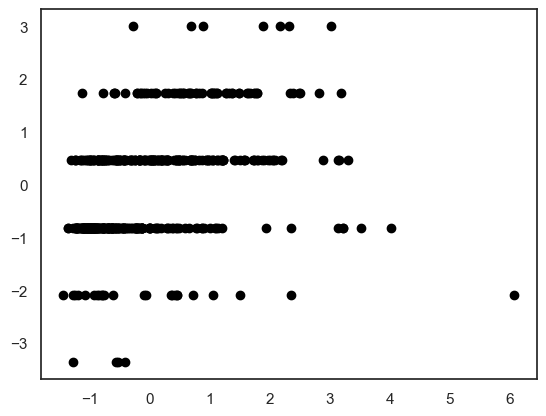

Min:  -1.447508266474689 Max:  6.075123690479586 Mean:  0.023023864290507075 Std:  1.0756872363903038


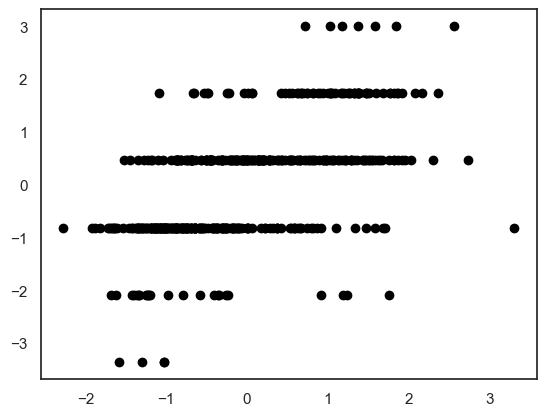

Min:  -2.27423558889142 Max:  3.305643725995543 Mean:  -0.058002222691798694 Std:  0.9891670187754993


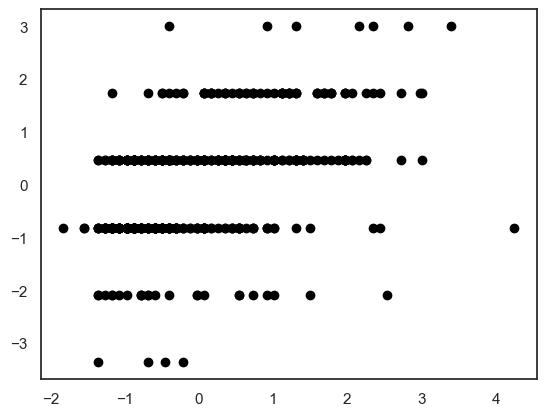

Min:  -1.8281378766756977 Max:  4.249387489599885 Mean:  -0.006828206782172419 Std:  1.0383124109761126


In [9]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())